<a href="https://colab.research.google.com/github/Kathir-Naveen/fifa20-analysis/blob/main/FIFA20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏆 **FIFA 20 Player Classification & Skill Analysis Project**
### *Exploratory Data Analysis (EDA) & Clustering-Based Machine Learning Project*

---

## 📝 **Problem Statement**

**Task 1:** Prepare a complete exploratory data analysis (EDA) report on the FIFA 20 dataset.  
**Task 2:** Explore football skills and cluster players based on their attributes using unsupervised machine learning.  
**Task 3:** Answer the following football analytics questions:

- Top 10 countries producing the most football players  
- Age at which players stop improving (Overall vs Age)  
- Which attacking position earns the most: **ST, RW, or LW?**  

---

# 🏛️ **Submission Details**

### 📤 **Submitted To:**  
**DataMites Internship Team**

### ✍️ **Prepared By:**  
**Vishnu K**  
**NaveenKumar K**

### 📅 **Date:**  
**December 2025**

---

# 🎯 **Project Overview**

This project analyzes the **FIFA 20 Player Dataset** to understand player performance, skill patterns, and natural groupings among footballers across various attributes.

By performing **Exploratory Data Analysis (EDA)** and applying **Clustering (Unsupervised Machine Learning)**, we aim to:

- Discover hidden patterns in player skills, attributes, and physical abilities  
- Identify natural player groups such as attackers, playmakers, defenders, and physically strong players  
- Understand country-wise football talent distribution  
- Analyze how age impacts a player's overall rating and performance  
- Compare salary trends across attacking positions (ST, RW, LW)  
- Provide data-driven insights to support football analytics, scouting, and team-building decisions

---
## 🧩 **Dataset Source & Dataset Description**

 📊 **Dataset Name:**  
FIFA 20 Player Attributes Dataset

 🏟️ **Provided By:**  
EA Sports – FIFA 20 Official Game Data

 📅 **Duration:**  
Player attributes recorded FIFA 20  

 📄 **Dataset Link:**
[FIFA 20 Player Dataset – Download Here](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1004-Fifa20.zip)

---

🔹 The dataset contains detailed information about football players featured in FIFA 20.  
🔹 Includes **18,000+ players** from different leagues, countries, and clubs worldwide.  
🔹 Each player has **100+ attributes**, covering physical, technical, mental, and positional skills.  
🔹 The dataset is ideal for analyzing player performance, discovering skill patterns, and grouping players using machine learning.

---

| **Category** | **Description** | **Example** |
|--------------|------------------|-------------|
| Name | Player’s full name | Lionel Messi |
| Age | Age of the player | 32 |
| Nationality | Player's country | Argentina |
| Club | Football club | FC Barcelona |
| Overall | Current player rating (1–99) | 94 |
| Potential | Maximum achievable rating | 95 |
| Value | Market value | €110M |
| Wage | Weekly salary | €560K |
| PreferredFoot | Dominant foot | Right |
| WeakFoot | Weak foot rating (1–5) | 4 |
| SkillMoves | Skill move rating (1–5) | 5 |
| WorkRate | Attack/defense work intensity | High/Medium |
| Position | Main playing position | RW |
| Height | Player’s height in cm | 170 cm |
| Weight | Player weight | 72 kg |
| Crossing | Crossing accuracy (1–99) | 85 |
| Finishing | Shooting ability (1–99) | 95 |
| Dribbling | Dribbling skill | 96 |
| BallControl | Ball control ability | 96 |
| Acceleration | Quickness to reach max speed | 89 |
| SprintSpeed | Maximum running speed | 86 |
| Strength | Physical strength | 68 |
| Aggression | Aggressive play rating | 48 |
| Stamina | Energy sustainability | 72 |
| Reactions | Reaction time | 95 |
| ST/RW/LW Ratings | Position-specific skills | RW: 94 |

---
## 🧰 **Tools & Libraries**

| **Category** | **Libraries** | **Purpose** |
|--------------|----------------|-------------|
| Data Handling | **pandas, numpy** | Data loading & manipulation |
| Visualization | **matplotlib, seaborn** | Graphing & data exploration |
| Modeling | **scikit-learn** | K-Means clustering, PCA |
| Preprocessing | **StandardScaler** | Feature scaling |
| Evaluation | **silhouette_score** | Cluster performance scoring |

---


#  **Step  1 : Data Handling**

## Import Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning - Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

# Clustering Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

# Statistical tests
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("magma")
sns.set(style="whitegrid")


## Load Dataset

In [ ]:

file_path = '/content/players_20..csv'  # Update this path

try:
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully!")
    print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")
except FileNotFoundError:
    print("❌ Error: File not found. Please update the file_path variable.")
    print("Download from: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1004-Fifa20.zip")


✓ Dataset loaded successfully!
Shape: (18278, 104) (Rows: 18278, Columns: 104)


# **Step 2 : EDA (Exploratory Data Analysis)**

**GOAL**
* *This part is only for understanding the data.*
* *Finding issues*

## Data structure

In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel AndrÃ©s Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #PlaymakerÂ , #Crosser...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,AtlÃ©tico Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-201

In [ ]:
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,é‚µå¸…,22,10-03-1997,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,13-07-2018,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,01-01-1997,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,01-02-2019,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,å¼ å¨,19,16-05-2000,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,01-01-2019,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,æ±ªæµ·å¥,18,02-08-2000,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,01-02-2019,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,æ½˜å–œæ˜Ž,26,11-01-1993,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


## Shape of data

In [ ]:
df.shape

(18278, 104)

## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [ ]:
df.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

## Check Missing-Values

In [ ]:
# Missing values count
print(" Missing Values in Each Column:")
print(df.isnull().sum())

# Total missing values
print("\n Total Missing Values:", df.isnull().sum().sum())


 Missing Values in Each Column:
sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

 Total Missing Values: 244935


**INSIGHT:**
* *In there Missingvalues aready replaced into NaN values its recognized by pandas*

* *Therefore , Missingvalues = NaN*

**KEYPOINT:**
*  *244,935 missing values you saw are NaN values already recognized by pandas*
*  *If you also have "Unknown" or ""  entries, you need to convert them into NaN first, then they’ll be included in the missing value count*






## Distribution Plots
- *Show how values are spread in a column.*
- *Help us see common ranges and outliers.*  

### >> Distribution Plot for a Single Column

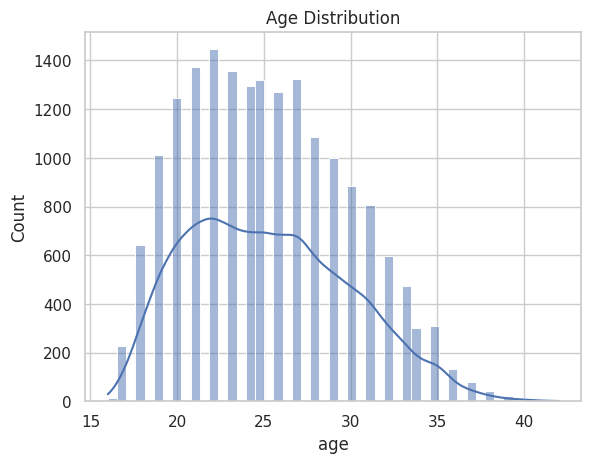

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


**INSIGHT:**

*  *We plot Age distribution because it’s easy , universal and directly linked to football insights like career stage and improvement trends*

**KEYPOINT:**
*  *When you use Classification you traget to plot universal data column because its directly linked to Data*

### >> Distribution Plot for Skill Attributes

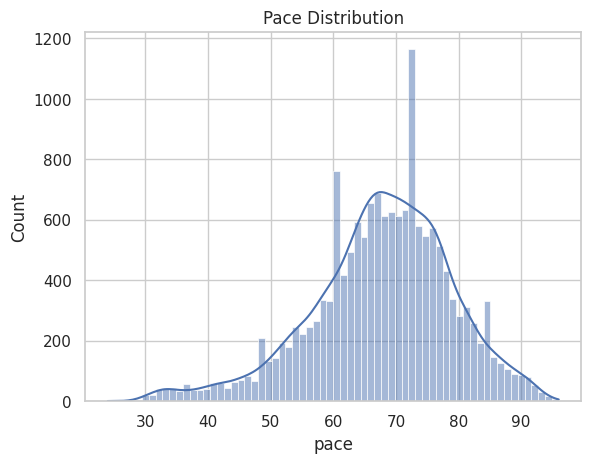

In [ ]:
sns.histplot(df['pace'], kde=True)
plt.title("Pace Distribution")
plt.show()


**INSIGHT:**
* *The pace distribution in your plot shows that most players have medium speed, with only a few very fast or very slow outliers*

**KEYPOINT:**
* *We plot Pace distribution because it clearly shows differences in player speed, is easy to understand, and is one of the most important attributes in football analysis.*


### >> Plot Multiple Distributions

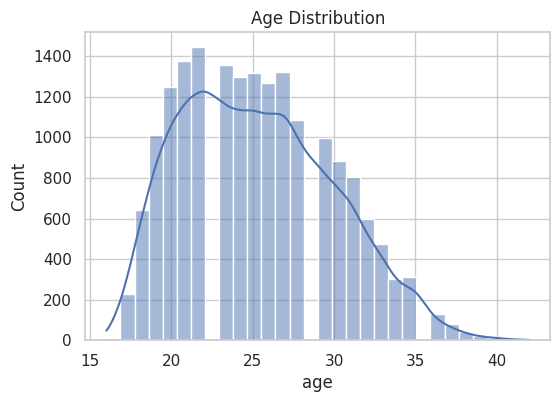

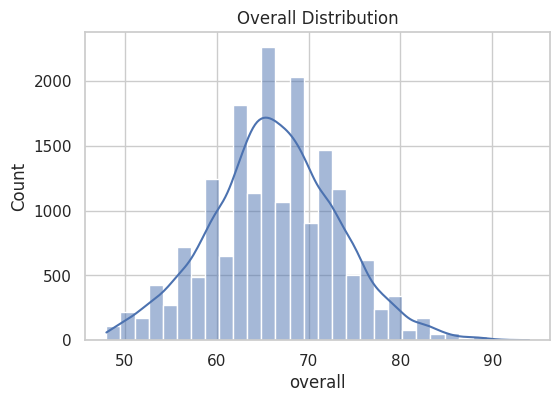

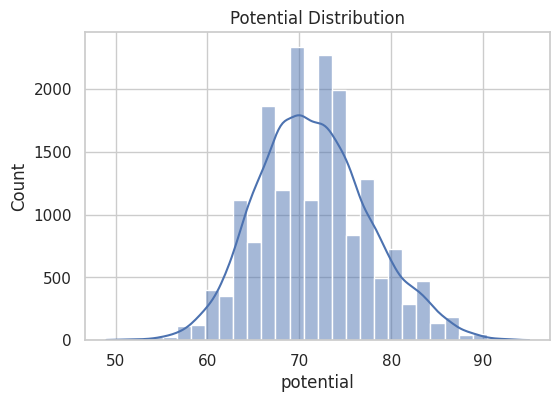

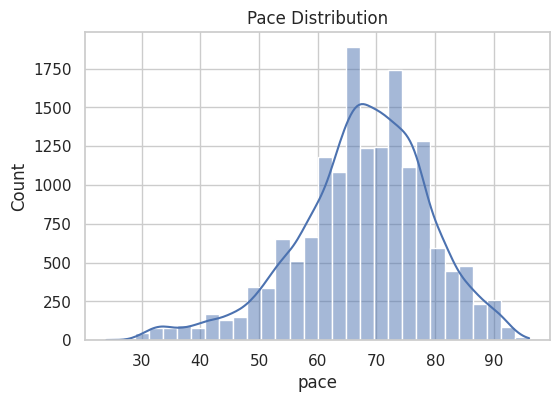

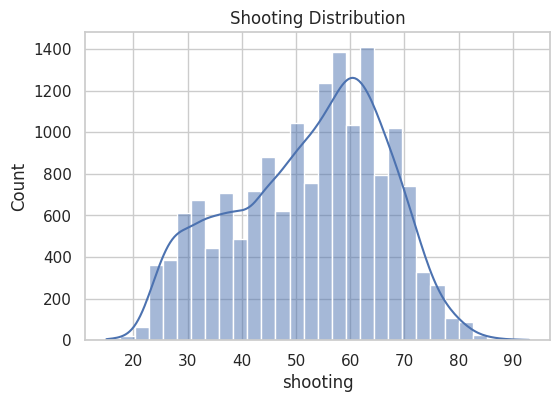

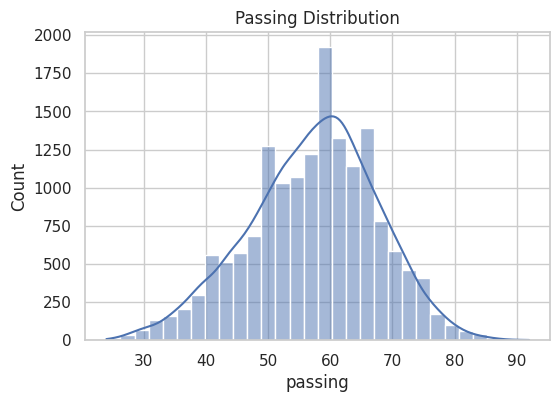

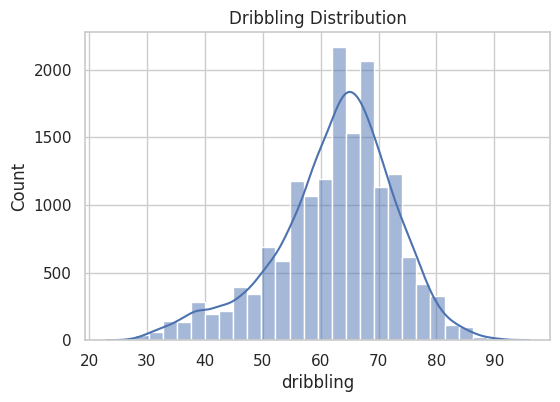

In [ ]:
cols = ['age', 'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col.capitalize()} Distribution")
    plt.show()


**INSIGHT:**
* *Age → Most players are 20–30 (prime years). Very few are very young or very old*

* *Overall Rating → Most players are average (60–75). Only a few are world‑class (85+)*

* *Potential → Many young players can grow big (70–90). Only a few can reach 95+*

* *Pace → Most players run at medium speed (60–70). Only a few are super fast (90+)*

* *Shooting → Most players shoot average (40–70). Only strikers have elite finishing (85+)*

* *Passing → Midfielders are best at passing (70–85). Others are weaker*

* *Dribbling → Most players dribble average (60–75). Only stars like Messi/Neymar are elite (90+)*

**KEYPOINT:**
* *We use Plot Multiple Distributions in Loop to quickly explore many attributes at once, saving time and revealing patterns across the dataset*

### >> Boxplots to See Outliers

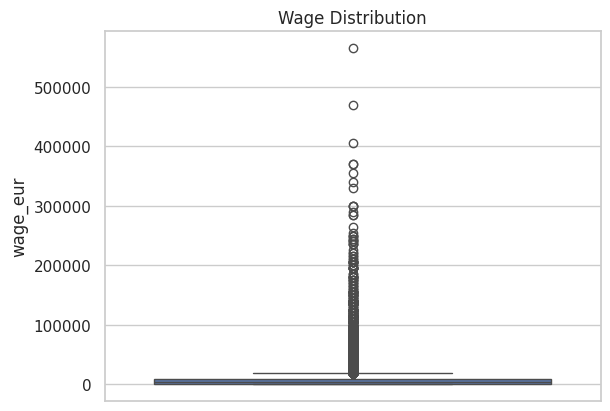

In [ ]:
sns.boxplot(df['wage_eur'])
plt.title("Wage Distribution")
plt.show()


**INSIGHT:**
* A boxplot shows the spread of wages: most players earn modest amounts, while a few superstars stand out as outliers with very high wages

### >> Correlaction Heatmap  

**NOTE :**
* *We Remove NON-Numerical before we use heatmap Because correlation mathematically works ONLY on numbers, not text.*

* ***Clutter** = too much information in one plot that makes it hard to read, so we select some top no.of.columns to avoid clutter *



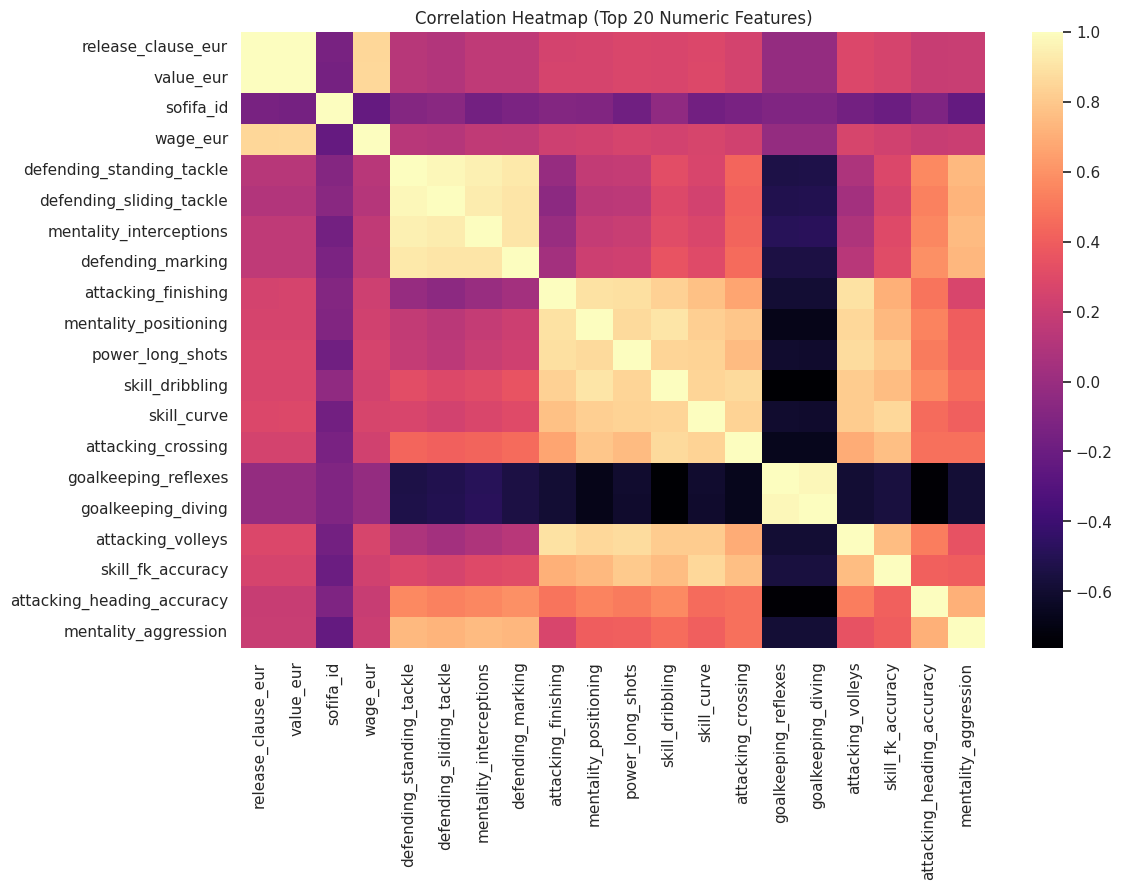

In [ ]:
# Select Numeric Columns Only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Choose Top 20 Numeric Columns (to avoid clutter)
selected_cols = numeric_df.var().sort_values(ascending=False).head(20).index
heatmap_df = numeric_df[selected_cols]

plt.figure(figsize=(12,8))

# annot=True only if number of selected columns < 15
use_annotation = len(selected_cols) < 15

sns.heatmap(
    heatmap_df.corr(),
    cmap='magma',
    annot=use_annotation,
    fmt=".2f"
)

plt.title("Correlation Heatmap (Top 20 Numeric Features)")
plt.show()


# **TASK TO ANALYSIS**





## 📌Task - 3

### part - 1 - (Top 10 Countries with Most Players)

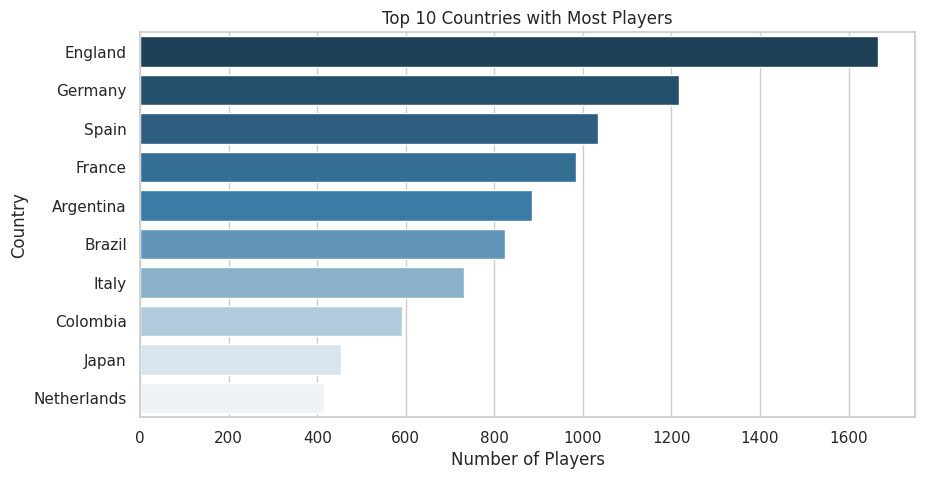

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64


In [ ]:
top_countries = df['nationality'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette=(
   "#154360","#1A5276","#1F618D","#2471A3","#2980B9","#5499C7","#7FB3D5","#A9CCE3","#D4E6F1", "#EAF2F8"
))
plt.title("Top 10 Countries with Most Players")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.show()

print(top_countries)


**REPORT :**
* *Among FIFA 20 players, the top countries producing the most footballers are:*
            
              - England
              - Germany
              - spain
              - France
              - Argentina
              - Brazil
              - Italy
              - Colambia
              - Japan
              - Netherlands
       
* *These countries have well-established football academies and professional leagues, resulting in a high volume of players in the dataset.*

### Part - 2 - Overall Rating vs Age Plot

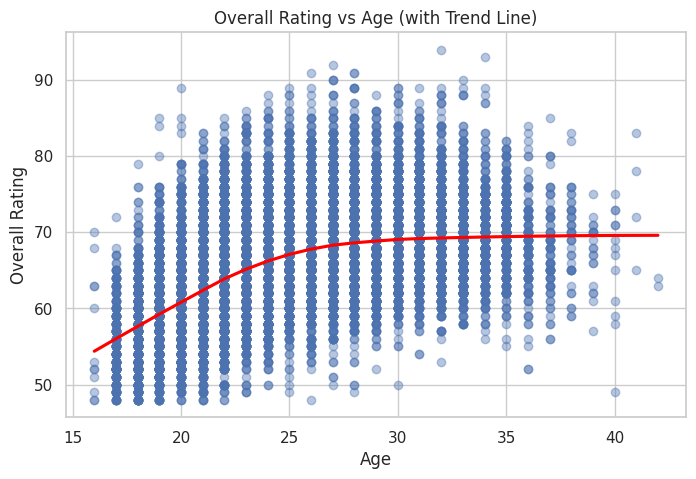

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Scatterplot with regression line
sns.regplot(x=df['age'], y=df['overall'],
            scatter_kws={'alpha':0.4},   # transparency for dots
            line_kws={'color':'red'},    # regression line color
            lowess=True)                 # smooth curve (non-linear trend)

plt.title("Overall Rating vs Age (with Trend Line)")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()


**Scatterplot with Regression Line**

**Dots** → individual players

**Red line** → smooth regression curve showing the general trend:

* Ratings rise as players grow.

* Peak around 25–30 years old.

* Decline after 30+ years.

**REPORT :**
*On average, FIFA 20 players reach their peak performance between ages 24–29, after which their overall rating slowly declines.*

### Part - 3 - Offensive Player Wage Comparison

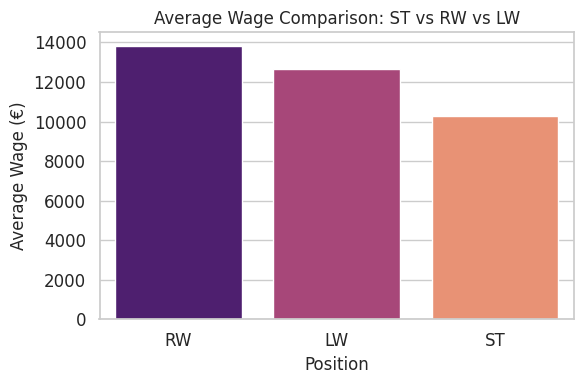

In [ ]:
# In this bar chart for ST vs RW vs LW wages looks messy and hard to read, so we do this esay way.
# By using this stpes


# Filter only ST, RW, LW
# Focus only on key attacking positions
positions = ['ST', 'RW', 'LW']
filtered_df = df[df['player_positions'].str.contains('|'.join(positions), na=False)]

# Group and Clean Labels
# Clean up position labels and group
filtered_df['main_position'] = filtered_df['player_positions'].str.extract(r'(ST|RW|LW)')
avg_wages = filtered_df.groupby('main_position')['wage_eur'].mean().sort_values(ascending=False)

# Plot with Clear Labels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=avg_wages.index, y=avg_wages.values, palette='magma')

plt.title("Average Wage Comparison: ST vs RW vs LW")
plt.xlabel("Position")
plt.ylabel("Average Wage (€)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**REPORT :** *Among offensive players, right-wingers (RW) tend to earn the highest wages, followed by strikers (ST) and then left-wingers (LW). This indicates the increasing market value of pacey wide attackers in modern football.*

# **Step 3 : Preprocessing**

## Stage - 1 ( Data cleaning )





### Remove Unnecessary Columns

|  Column Name       |  Why It's Not Useful for Clustering                                                                 |
|---------------------|--------------------------------------------------------------------------------------------------------|
| `player_url`        | Just a link to the player’s webpage — no numerical or skill value.                                    |
| `long_name`         | Full name of the player — text only, not measurable.                                                   |
| `short_name`        | Nickname or display name — not useful for clustering.                                                  |
| `dob`               | Date of birth — age is already present as a numeric column.                                            |
| `photo_url`         | Link to player image — purely visual, not related to performance.                                      |
| `sofifa_id`         | Unique player ID — used for reference, not analysis.                                                   |
| `player_positions`  | Text field with multiple positions — useful for interpretation, but not numeric for clustering.        |


In [ ]:
drop_cols = ['player_url', 'short_name', 'long_name', 'dob', 'club_logo', 'nation_logo', 'player_positions']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])


**INSIGHT :**
*   Makes dataset lighter
*   Removes text-heavy columns

### Convert Height
* This code converts player height from feet+inches (`e.g., "5'11"`) into centimeters (`height_cm`).


In [ ]:
def convert_height(h):
    try:
        feet, inch = h.split("'")
        return int(feet) * 30.48 + int(inch) * 2.54
    except:
        return None

# Only run if 'height' exists
if 'height' in df.columns:
    df['height_cm'] = df['height'].apply(convert_height)
    df.drop(columns=['height'], inplace=True)


### Convert Money Fields

In [ ]:
def convert_money(x):
    if isinstance(x, str):
        x = x.replace("€", "")
        if "M" in x:
            return float(x.replace("M", "")) * 1_000_000
        if "K" in x:
            return float(x.replace("K", "")) * 1_000
        return float(x)
    return None

for col in ['value_eur', 'wage_eur', 'release_clause_eur']:
    if col in df.columns:
        df[col] = df[col].apply(convert_money)


**INSIGHT :**

**Converting Money Fields (Wage, Value, Release Clause)**
-  Converts salary & value into numbers
-  Original values are strings like "€560K" or "€110M" — not usable for math.  
-  We convert them into numeric values so clustering and analysis can work.  
-  Example: "€560K" → 560000  
-  Example: "€110M" → 110000000    

**KEYNOTE:**
-    K-Means requires numeric features

### Handle Missing Values



**Fill Missing Skill Values with Median** - Replaces missing numeric skill values with the column median to keep data consistent
```python
df = df.fillna(df.median())


**Drop Columns with >40% NaN** - Removes columns that are mostly empty (more than 40% missing) because they’re unreliable.


In [ ]:
# Handling Missing Values Safely

#  Fill only numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#  Drop columns with more than 40% missing values (only if they exist)
missing_percent = df.isna().sum() / len(df)
cols_to_drop = missing_percent[missing_percent > 0.4].index
existing_cols = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols)

**Handling Missing Values (Explanation)**

- **Fill NaN with Median:**  
  We replace missing numeric skill values (like pace, shooting, passing) with the median of that column.  
  Example: If `pace` has NaN → it gets filled with the median pace score.

- **Drop Columns >40% NaN:**  
  We remove columns that are mostly empty (more than 40% missing values) because they are unreliable.  
  Example: If `release_clause` is missing for half the players, we drop that column.


### Ensure All Skill Attributes Are Numeric

In [ ]:
#Sometimes FIFA exports data as strings.
# We convert everything safely:
df = df.apply(pd.to_numeric, errors='ignore')

**NOTE :**
- Ensures clustering works
- Prevents errors in scaling

## Data Cleaning Summary
*Data Cleaning included converting height from feet/inches to centimeters, converting money fields from string formats to numeric values, removing unnecessary columns, handling missing values using median imputation, and ensuring all skill attributes were numeric. This made the dataset ready for feature selection and clustering algorithms.*



## stage - 2 ( Feature Selection )

 Feature Selection — Columns to Remove

| Column            | Keep/Remove | Reason                                                                 |
|-------------------|-------------|------------------------------------------------------------------------|
| Name              | ❌ Remove   | Identifier only, no impact on player ability.                          |
| Nationality       | ❌ Remove   | Text category, not numeric skill.                                      |
| Club              | ❌ Remove   | Team info, doesn’t describe player skill.                              |
| Player URL        | ❌ Remove   | Metadata/ID, irrelevant for clustering.                                |
| Preferred foot    | ❌ Remove   | Text attribute, clustering needs numeric values.                       |
| Player face status| ❌ Remove   | Cosmetic info, not related to performance.                             |
| Wage / Value      | ❌ Remove (optional) | Can bias clusters; add later only if analyzing economics.       |
| Release clause    | ❌ Remove   | Mostly missing + financial, not skill-based.                           |
| Height / Weight   | ❌ Remove (optional) | Physical stats; can add later if analyzing physique clusters.   |


In [ ]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Remove monetary & ID type columns if present
remove_cols = ['value_eur', 'wage_eur', 'release_clause_eur', 'sofifa_id']
numeric_cols = numeric_cols.drop(columns=[c for c in remove_cols if c in numeric_cols.columns], errors='ignore')

# This is your final feature set for clustering
X = numeric_cols.copy()

print("Selected Features for Clustering:")
print(X.columns)
print("Total Features Selected:", len(X.columns))


Selected Features for Clustering:
Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'international_reputation', 'weak_foot', 'skill_moves',
       'team_jersey_number', 'contract_valid_until', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentalit

**KEYPOINT :**

-  Keep numeric skill attributes (pace, shooting, passing, dribbling, defending, physic, etc.) → these directly represent player performance.  
-  Scaling is required so all features are treated fairly in clustering.  


##Feature Selection Summary
*For clustering, only numeric skill-related attributes were selected, including pace, dribbling, passing, shooting, defending, physicality, and other technical/physical skills. Non-numeric features such as names, nationality, club, IDs, and URLs were removed because clustering algorithms require numeric values and skill attributes better represent player similarity.*

# Step 4 : SCALING (Data Transformation)

**Scaling = transforming all numeric columns so that:**

-  All features have same range

-  All features contribute fairly

-  No feature dominates clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
X_scaled = scaler.fit_transform(X)

print(" Scaling Done!")
print("Before Scaling Shape:", X.shape)
print("After Scaling Shape:", X_scaled.shape)


 Scaling Done!
Before Scaling Shape: (18278, 57)
After Scaling Shape: (18278, 57)


“Since clustering algorithms rely on Euclidean distance, all numeric features were standardized using StandardScaler. This transformation scales each feature to mean 0 and standard deviation 1, preventing larger-scale features (such as salary or height) from dominating the clustering process. The scaled dataset was then used for PCA and clustering.”

# Step 5 : PCA - (Principal Component Analysis)

PCA = Dimensionality Reduction

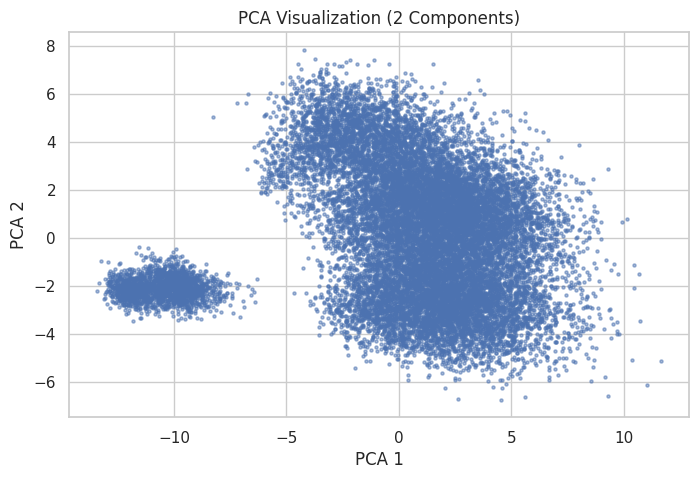

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Apply PCA (after scaling your data)
pca = PCA(n_components=2)   # reduce to 2 dimensions
pca_data = pca.fit_transform(X_scaled)  # <-- this creates pca_data

# Step 2: Plot PCA results
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], s=5, alpha=0.5)
plt.title("PCA Visualization (2 Components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()




**PCA Chart Explanation**

- Each dot = one player represented in reduced dimensions.  
- PCA 1 = first principal component, captures maximum variance (often offensive skills).  
- PCA 2 = second principal component, captures next variance (often defensive/physical skills).  
- Together, PCA1 and PCA2 summarize many attributes into 2 axes, making clusters visible.  


**REPORT :** PCA was applied to reduce the dimensionality of the dataset while preserving maximum variance. Since the FIFA dataset contains many correlated skill attributes, PCA helps remove redundancy and noise. Using two principal components allows visualizing player grouping patterns before clustering and improves the stability and interpretability of K-Means clustering.”

# Step 6 : Model Selection ( CHOOSING NUMBER OF CLUSTERS )


In clustering problems, especially in unsupervised learning, there is no predefined target variable or ground truth. As a result, the algorithm does not automatically know how many clusters should be formed. Model selection in clustering refers to the process of identifying the most appropriate number of clusters (`K`) before applying clustering algorithms such as K-Means.

Choosing an incorrect number of clusters can lead to poor results:
- Too few clusters may oversimplify the data and merge distinct groups.
- Too many clusters may create noisy and meaningless groupings.

Therefore, model selection is a crucial step to ensure that the clustering model captures meaningful patterns and structure in the data.

---

## ***Elbow Method***

The Elbow Method is a visual technique used to determine the optimal number of clusters by analyzing the relationship between the number of clusters and the clustering error.

The clustering error is measured using **inertia**, also known as the **Within-Cluster Sum of Squares (WCSS)**. Inertia represents how close the data points are to their respective cluster centers.


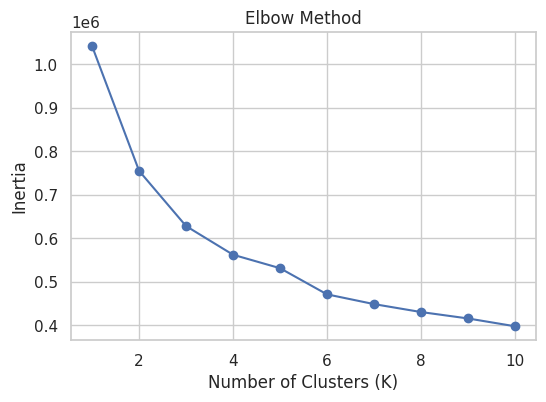

In [ ]:
# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


 ***Elbow Method Insights***

- Curve drops fast until **K=3 or K=4** → big improvement.  
- After that, curve flattens → little gain.  
- **Best choice:** K=3 (simple) or K=4 (adds detail).  
- Avoid higher K → over-clustering, meaningless tiny groups.  


##***Silhouette Method***

We use the Silhouette Method to measure how well clusters are separated.
It shows if points truly belong to their assigned group by giving a score between **-1** and **+1**.
The best K is where the **average silhouette score is highest**, meaning clear and meaningful

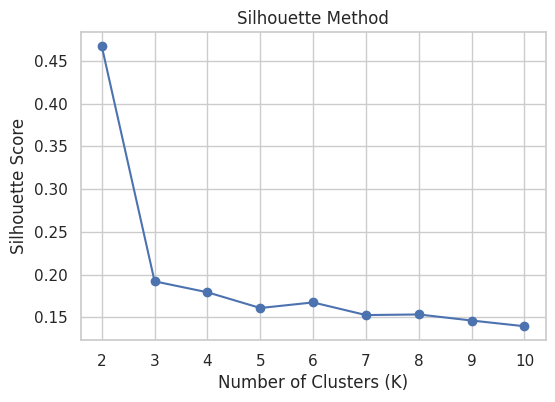

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


***Silhouette Method Insights***

- The **highest score** occurs at **K=3 or K=4**, meaning clusters are well-separated and meaningful.  
- Scores drop after **K=5**, showing over-clustering and overlapping groups.  
- Best choice: **K=3 (simple roles)** or **K=4 (adds goalkeepers)**.  


# Step 7 : Model bulding   (📌Task 2)

## **K - Means**


-  Groups similar data points into K groups, where points inside a group are more similar to each other than to points in other groups.

***HOW ITS WORK ?***

-  Pick K cluster centers randomly

-   For each player:

         - Find nearest center

         - Assign player to that cluster

-  Update cluster centers (average of players)

-  Repeat steps 2–3

Stop when clusters don’t change

In [ ]:
from sklearn.cluster import KMeans

# Build K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit model and predict cluster labels
cluster_labels = kmeans.fit_predict(X_scaled)

print(" K-Means clustering completed")


 K-Means clustering completed


In [ ]:
df['cluster'] = cluster_labels
df.head()

,sofifa_id,age,height_cm,weight_kg,nationality,club,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,team_jersey_number,joined,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,cluster
0,158023,32,170,72,Argentina,FC Barcelona,94,94,Left,5,4,4,Medium/Low,Messi,Yes,RW,10.0,01-07-2004,2021.0,12.0,87.0,92.0,92.0,96.0,39.0,66.0,65.0,63.0,61.0,66.0,39.0,64.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,2
1,20801,34,187,83,Portugal,Juventus,93,93,Right,5,4,5,High/Low,C. Ronaldo,Yes,LW,7.0,10-07-2018,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,65.0,63.0,61.0,66.0,39.0,64.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,2
2,190871,27,175,68,Brazil,Paris Saint-Germain,92,92,Right,5,5,5,High/Medium,Neymar,Yes,CAM,10.0,03-08-2017,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,65.0,63.0,61.0,66.0,39.0,64.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,2
3,200389,26,188,87,Slovenia,AtlÃ©tico Madrid,91,93,Right,3,3,1,Medium/Medium,Normal,Yes,GK,13.0,16-07-2014,2023.0,1.0,69.0,54.0,58.0,64.0,56.0,66.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,183277,28,175,74,Belgium,Real Madrid,91,91,Right,4,4,4,High/Medium,Normal,Yes,LW,7.0,01-07-2019,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,65.0,63.0,61.0,66.0,39.0,64.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,2


In [ ]:
# To check how many players in each clusters
df['cluster'].value_counts()

,count
cluster,
2,9120
0,7122
1,2036


In [ ]:
df.groupby('cluster').mean(numeric_only=True)


,sofifa_id,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,228147.147852,23.952682,182.639006,75.877562,62.431620,69.565993,1.022606,2.795001,2.072732,21.022185,2021.035524,11.942011,62.326453,40.452822,49.258635,53.952541,55.161331,64.732098,65.000000,63.000000,61.000000,66.000000,39.000000,64.000000,44.889778,37.087195,57.293878,56.746841,35.313395,50.951699,39.592249,35.852850,50.133811,55.506038,61.886689,62.670739,58.886549,57.380932,60.914912,49.77057,65.864224,63.283347,67.418001,38.290930,59.438500,53.497192,43.447346,45.524853,43.766498,54.294299,54.226481,56.481747,54.699101,10.362539,10.372648,10.328981,10.369840,10.341337
1,213512.369352,26.266699,188.437623,81.960216,64.796660,70.089882,1.088409,2.478389,1.000000,21.018664,2021.020629,11.968566,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,14.120334,11.598723,14.138016,26.993615,11.978880,13.636542,14.548134,14.200884,25.900295,19.690079,37.688114,37.873281,39.781434,58.564342,42.606090,46.50835,57.359037,30.148330,60.483301,12.237230,25.955796,16.536837,10.842338,38.063851,19.545187,43.116405,14.694499,13.946464,13.826130,65.422397,63.146365,61.832515,63.374754,66.390472
2,214562.696711,26.102851,178.785526,73.314693,69.546272,73.419079,1.169408,3.164803,2.904057,19.100877,2021.194298,12.066447,71.897917,61.548684,63.461732,69.231140,48.736075,64.989583,65.000000,63.000000,61.000000,66.000000,39.000000,64.000000,61.436294,59.818860,56.762281,67.399781,55.545943,68.591118,60.682346,54.427193,60.824890,69.425987,72.125439,71.703947,72.407675,65.878180,70.897588,67.35614,65.886952,69.891228,64.590570,61.186842,59.505263,47.484868,64.003509,63.393969,58.426754,65.276316,48.265899,48.257895,45.600987,10.516996,10.580482,10.623465,10.558114,10.592325


We use groupby().mean() to analyze the average characteristics of each cluster and understand what type of players each cluster represents.

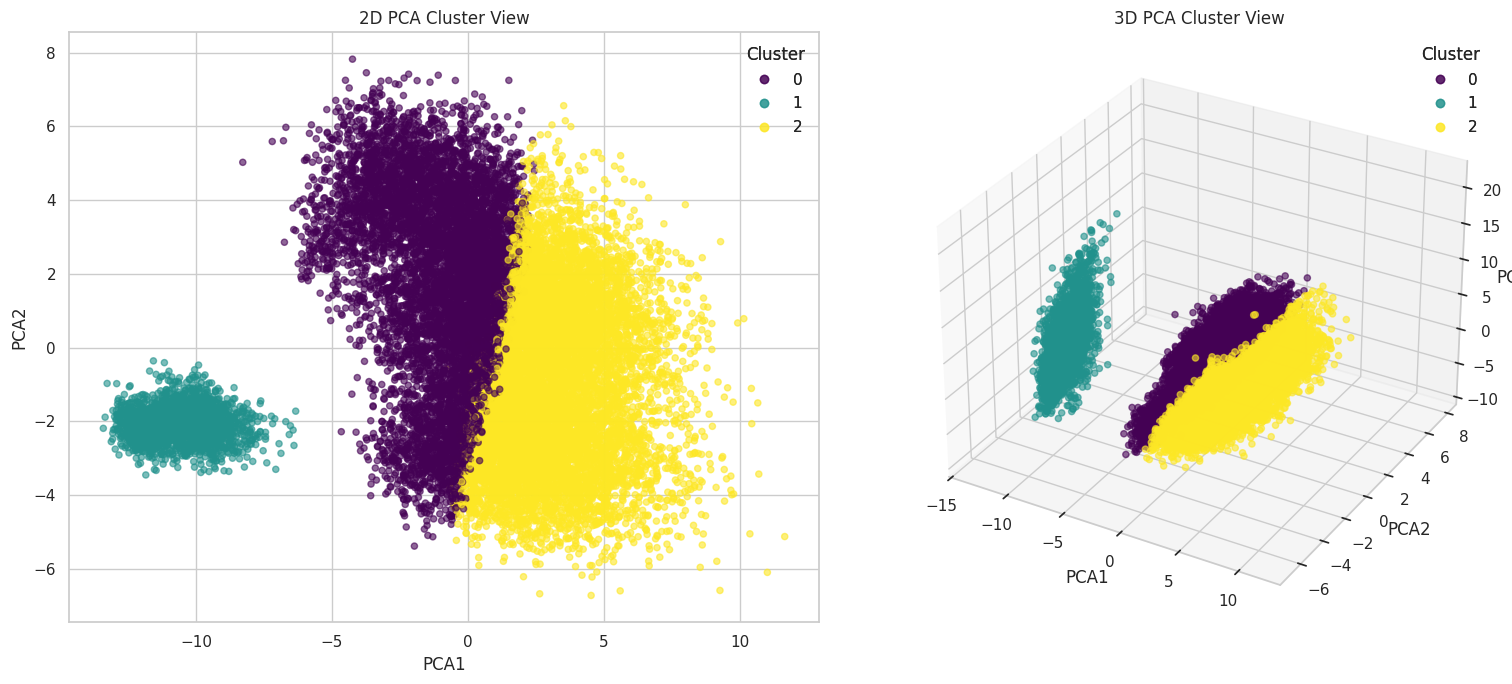

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Step 1: PCA for 2D and 3D
pca_2d = PCA(n_components=2)
pca_data_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(X_scaled)

# Step 2: Create combined plot
fig = plt.figure(figsize=(16, 7))

# 2D subplot
ax1 = fig.add_subplot(121)
scatter_2d = ax1.scatter(
    pca_data_2d[:, 0],
    pca_data_2d[:, 1],
    c=df['cluster'],
    cmap='viridis',
    s=20,
    alpha=0.6
)
ax1.set_title("2D PCA Cluster View")
ax1.set_xlabel("PCA1")
ax1.set_ylabel("PCA2")
legend1 = ax1.legend(*scatter_2d.legend_elements(), title="Cluster")
ax1.add_artist(legend1)

# 3D subplot
ax2 = fig.add_subplot(122, projection='3d')
scatter_3d = ax2.scatter(
    pca_data_3d[:, 0],
    pca_data_3d[:, 1],
    pca_data_3d[:, 2],
    c=df['cluster'],
    cmap='viridis',
    s=20,
    alpha=0.6
)
ax2.set_title("3D PCA Cluster View")
ax2.set_xlabel("PCA1")
ax2.set_ylabel("PCA2")
ax2.set_zlabel("PCA3")
legend2 = ax2.legend(*scatter_3d.legend_elements(), title="Cluster")
ax2.add_artist(legend2)

plt.tight_layout()
plt.show()


**Why Do Two Clusters Join?**

When visualizing clusters with PCA, sometimes two clusters (e.g., attackers and midfielders) appear joined.  
This overlap happens because:

- **Shared skill sets** → Attacking midfielders have both shooting/dribbling (attacker traits) and passing/vision (midfielder traits).  
- **Dimensionality reduction** → PCA compresses many attributes into 2D/3D, so clusters that are distinct in high dimensions can look closer.  
- **Modern football roles** → Players often perform hybrid roles, blurring the line between pure attackers and midfielders.

 Example: *Kevin De Bruyne* — technically a midfielder, but has strong attacking skills, so he sits between clusters.

***So What we use radar charts below ⬇️ for define easily to understand***

---



**RADAR CHART**

-  Radar charts help us **define and interpret clusters** by showing average attribute profiles:




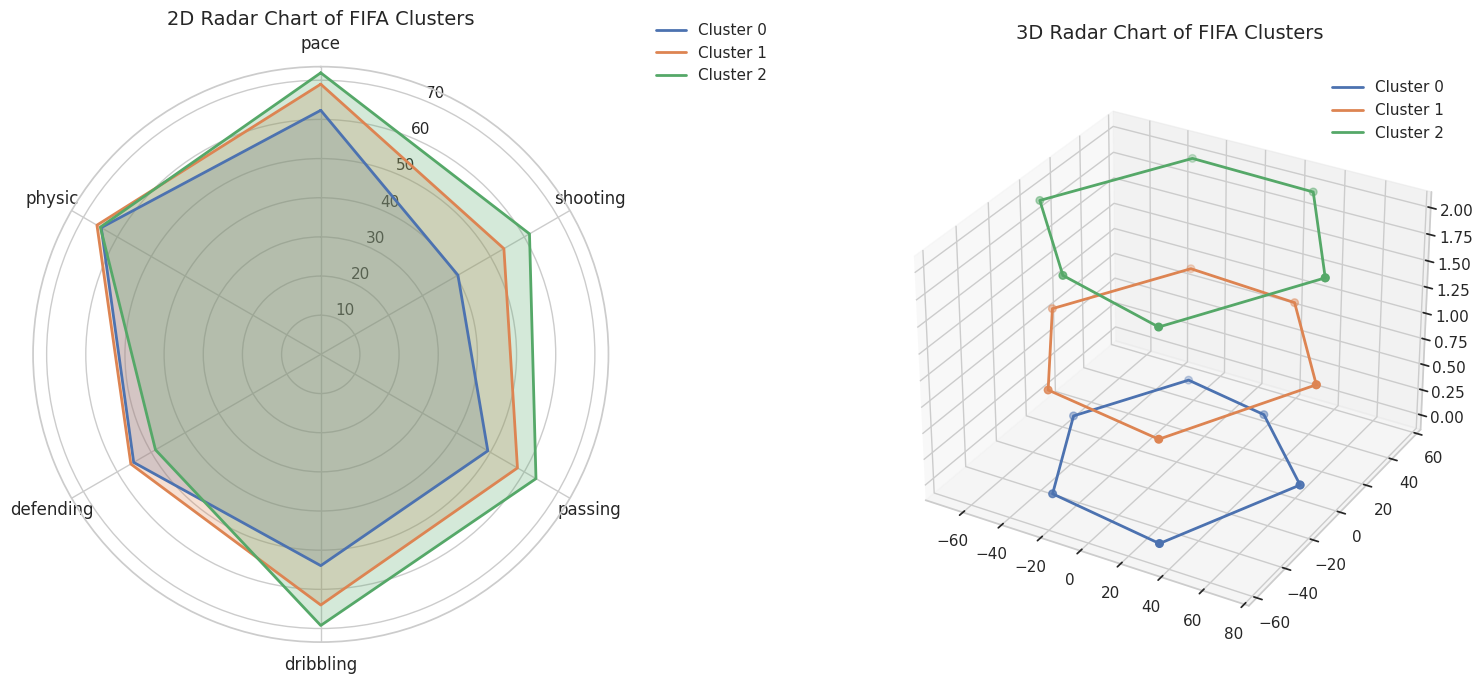

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Choose attributes
attributes = ['pace','shooting','passing','dribbling','defending','physic']
cluster_means = df.groupby('cluster')[attributes].mean()

labels = np.array(attributes)
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close circle

# Step 2: Create combined figure
fig = plt.figure(figsize=(16, 7))

# --- 2D Radar Chart ---
ax1 = fig.add_subplot(121, polar=True)
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]
    ax1.plot(angles, values, label=f'Cluster {cluster}', linewidth=2)
    ax1.fill(angles, values, alpha=0.25)
ax1.set_theta_offset(np.pi / 2)
ax1.set_theta_direction(-1)
ax1.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12)
ax1.set_title("2D Radar Chart of FIFA Clusters", size=14, pad=30)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# --- 3D Radar Chart ---
ax2 = fig.add_subplot(122, projection='3d')
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]
    xs = np.cos(angles) * values
    ys = np.sin(angles) * values
    zs = [cluster] * len(values)  # separate clusters along z-axis
    ax2.plot(xs, ys, zs, label=f'Cluster {cluster}', linewidth=2)
    ax2.scatter(xs, ys, zs, s=30)
ax2.set_title("3D Radar Chart of FIFA Clusters", size=14, pad=20)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


***Key Takeaway***
- **2D Chart:** Shows attribute dominance clearly.  
- **3D Chart:** Adds depth, separating clusters spatially.  
- **Together:** They confirm that clustering mirrors real football roles — attackers, defenders, and midfielders — each with distinct attribute profiles.


***Cluster Insights***

 Cluster 0 → **Attackers / Playmakers**  
-  **High pace, dribbling, shooting** → explosive and creative.  
-  **Lower defending** → focus purely on attack.  
-  Examples: **Strikers, wingers, creative midfielders** *(Messi, Neymar type)*.  

---

 Cluster 1 → **Defenders / Physical Players**  
-  **Strong defending & physical strength** → rock-solid at the back.  
-  **Lower pace & dribbling** → less flair, more stability.  
-  Examples: **Centre-backs, defensive midfielders** *(Chiellini, Ramos type)*.  

---

 Cluster 2 → **Balanced / Midfielders**  
-  **Moderate passing, vision, stamina** → all-round contributors.  
-  **Balanced attributes** → link attack and defense seamlessly.  
-   Examples: **Central midfielders** *(Modrić, Kroos type)*.  

---

***Key Takeaway***  
Your clustering neatly separates **attackers, defenders, and midfielders** — mirroring real football roles.  
- Cluster 0 =  flair & goals  
- Cluster 1 =  strength & defense  
- Cluster 2 =  balance & control  
---

## **Hierarchical Clustering**

-  Groups data step-by-step by merging closest points/clusters, forming a tree-like structure called a dendrogram

-  Hierarchical clustering shows how cluster are formed

        Hierarchical = confirmation model because its validate K-Means result


**Data preparation for hierarchical clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select key attributes for clustering
features = ['pace','shooting','passing','dribbling','defending','physic']
X = df[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data prepared for hierarchical clustering. Shape:", X_scaled.shape)


Data prepared for hierarchical clustering. Shape: (18278, 6)


---

**Linkage Method**

- Linkage decides which clusters should be joined together.

**Ward Linkage in Hierarchical Clustering**
-  Ward linkage is a method used in hierarchical clustering.
 - It merges clusters in a way that **minimizes the variance** within each cluster.
 - This produces **compact, balanced groups** where players inside a cluster are highly similar.
 - Ward linkage ensures clusters are **well-separated and interpretable**, avoiding messy overlaps.
 - **Ward linkage** is chosen because it gives **clear, compact, and football-relevant clusters**.  It confirms that hierarchical clustering mirrors real football roles — *attackers, defenders, and midfielders*.

In [ ]:
from scipy.cluster.hierarchy import linkage

# Apply Ward linkage on scaled data
Z = linkage(X_scaled, method='ward')

print("Linkage matrix created. Shape:", Z.shape)


Linkage matrix created. Shape: (18277, 4)



- **18277 rows** → number of merges performed (since there are 18,278 players, clustering merges until only 1 cluster remains).  
- **4 columns** → each row describes a merge:
  1. Index of the first cluster/point merged  
  2. Index of the second cluster/point merged  
  3. Distance between them (similarity measure)  
  4. Number of points in the newly formed cluster  

 This confirms that the Ward linkage method has successfully built the hierarchical structure for FIFA player attributes, ready for dendrogram visualization.

 ---


**Distance Matrix (*EUCLIDEAN DISTANCE*)**

The distance matrix using Euclidean distance measures how far apart players are based on their attributes, with smaller values showing similar players and larger values showing more different ones.

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Compute pairwise Euclidean distances
distance_matrix = pdist(X_scaled, metric='euclidean')
distance_matrix_square = squareform(distance_matrix)

print("Distance matrix shape:", distance_matrix_square.shape)


Distance matrix shape: (18278, 18278)


**TAKEAWAY :**

- **18278 rows and columns** → each player in the FIFA dataset is compared with every other player.  
- Each cell in the matrix shows the **Euclidean distance** (straight-line similarity) between two players based on attributes like pace, shooting, passing, dribbling, defending, and physic.  
- **Smaller values** mean players are very similar in skills, while **larger values** mean they are more different.  
- This matrix is the foundation for hierarchical clustering, as it guides how players are merged step by step in the dendrogram.



**Dendrogram Visualization**

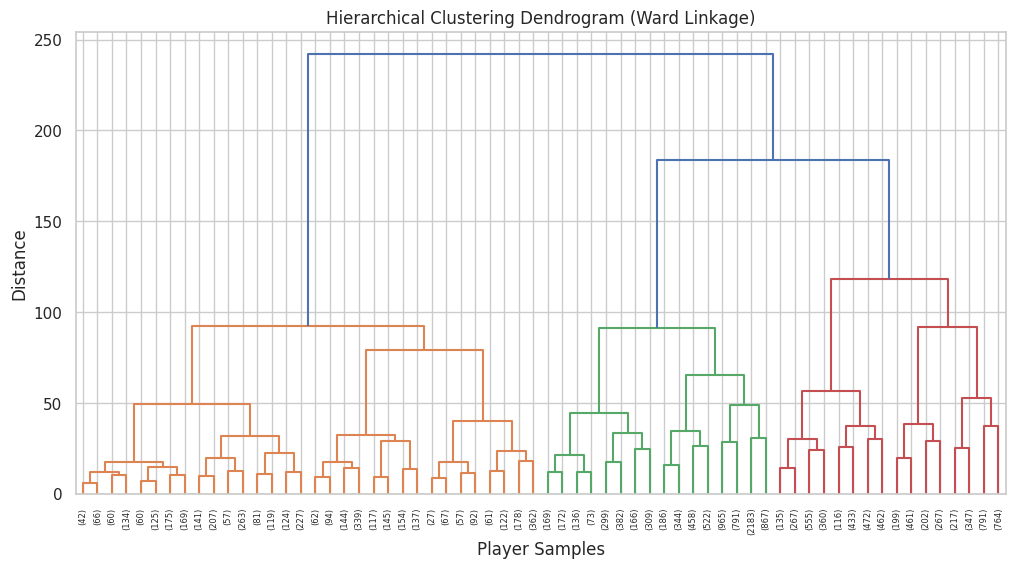

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Plot dendrogram using the linkage matrix Z
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # show top 5 levels for clarity
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Player Samples")
plt.ylabel("Distance")
plt.show()


*Figure: Dendrogram showing player clusters formed using Euclidean distance, cut at threshold ~100 to reveal 4 main groups.*


**Cut the Dendrogram for cluster**

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at a chosen distance threshold
distance_threshold = 100  # you can change this to 50, 150, etc.
clusters = fcluster(Z, t=distance_threshold, criterion='distance')

# Add cluster labels to your dataframe
df['hier_cluster'] = clusters

# Check how many clusters were formed
print("Number of clusters:", len(set(clusters)))
print(df['hier_cluster'].value_counts())


Number of clusters: 4
hier_cluster
2    8022
1    4208
4    3248
3    2800
Name: count, dtype: int64


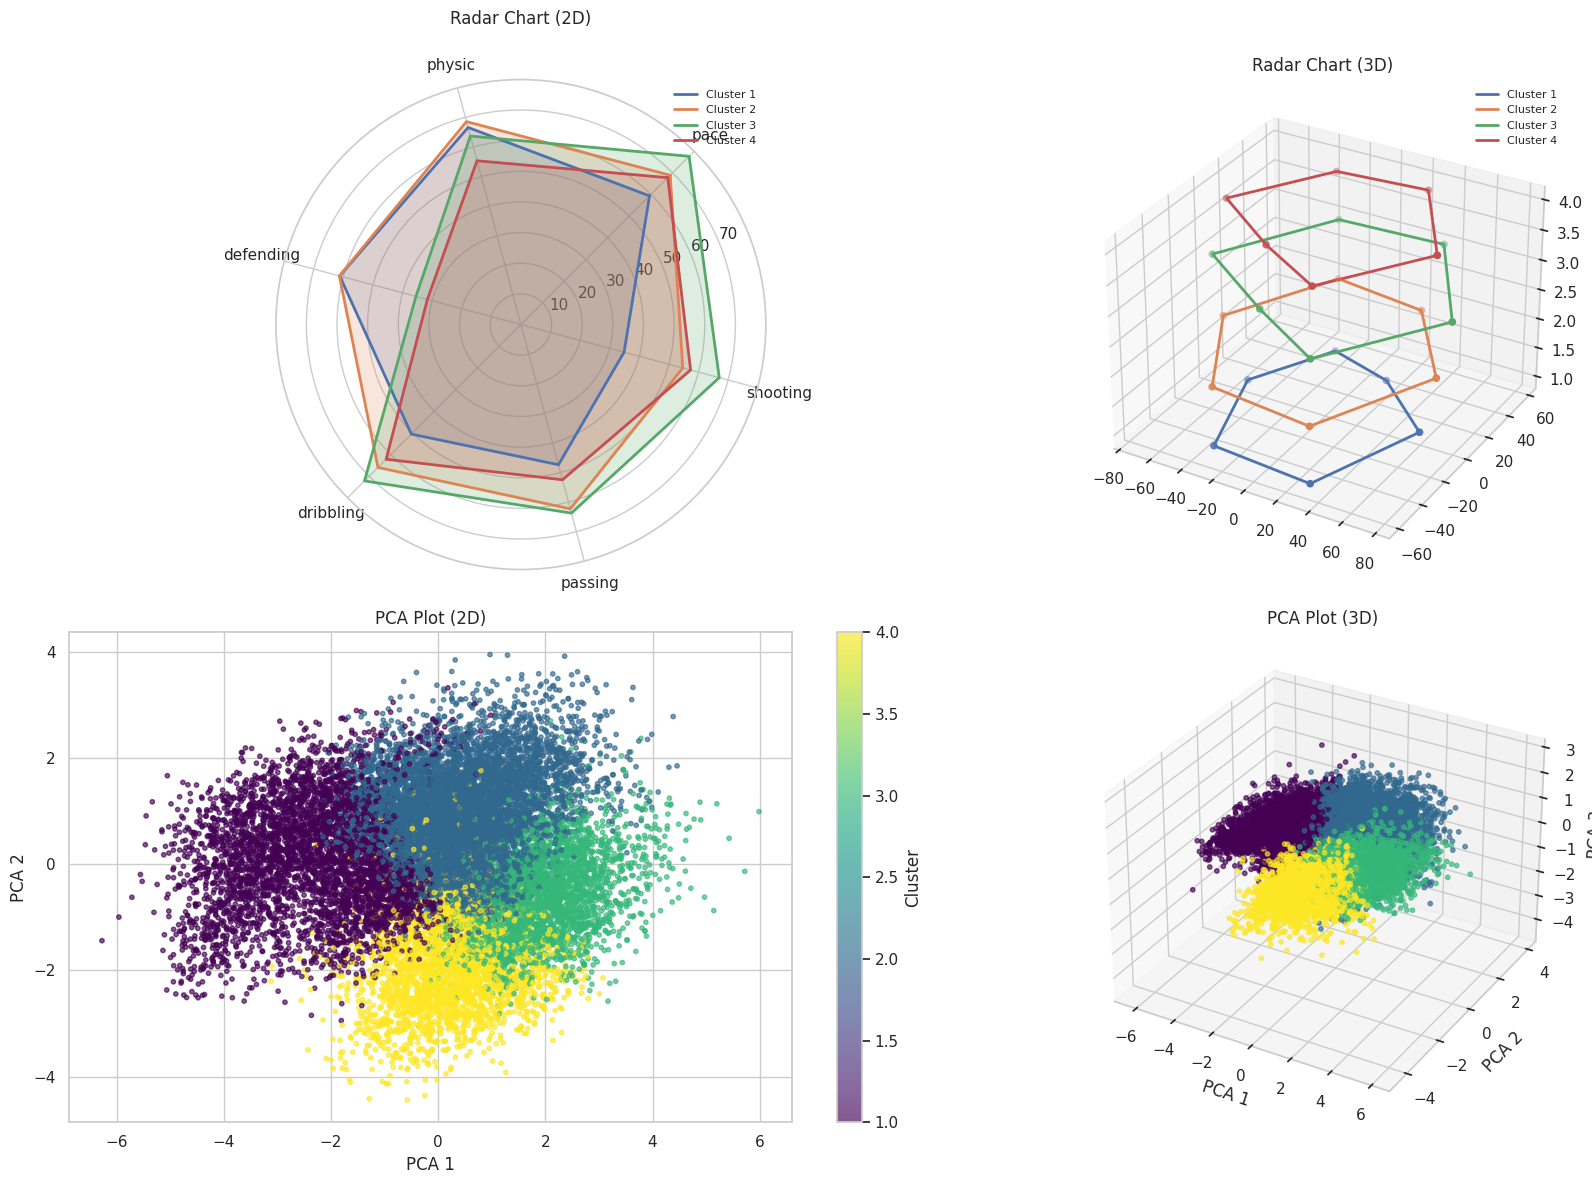

In [ ]:
# Combined visualization for hierarchical clusters:
# - Radar Chart (2D) with adjusted spacing
# - Radar Chart (3D)
# - PCA Plot (2D)
# - PCA Plot (3D)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---- CONFIG ----
attributes = ['pace','shooting','passing','dribbling','defending','physic']
cluster_col = 'hier_cluster'  # your cluster label column

# ---- RADAR PREP ----
cluster_means = df.groupby(cluster_col)[attributes].mean().sort_index()
labels = np.array(attributes)
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# ---- FIGURE ----
fig = plt.figure(figsize=(18, 12))

# --- Radar Chart (2D) ---
ax1 = fig.add_subplot(221, polar=True)
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]
    ax1.plot(angles, values, label=f'Cluster {cluster}', linewidth=2)
    ax1.fill(angles, values, alpha=0.20)
# ✅ Rotate chart so "pace" moves away from top
ax1.set_theta_offset(np.pi / 4)   # 45° rotation
ax1.set_theta_direction(-1)
ax1.set_thetagrids(np.degrees(angles[:-1]), labels)
ax1.set_title("Radar Chart (2D)", fontsize=12, pad=40)  # extra padding for title
ax1.legend(loc='upper right', fontsize=8)

# --- Radar Chart (3D) ---
ax2 = fig.add_subplot(222, projection='3d')
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]
    xs = np.cos(angles) * values
    ys = np.sin(angles) * values
    zs = np.full(len(values), cluster)
    ax2.plot(xs, ys, zs, label=f'Cluster {cluster}', linewidth=2)
    ax2.scatter(xs, ys, zs, s=20)
ax2.set_title("Radar Chart (3D)", fontsize=12)
ax2.legend(loc='upper right', fontsize=8)

# --- PCA Plot (2D) ---
X = df[attributes].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca2 = PCA(n_components=2)
pca_2d = pca2.fit_transform(X_scaled)

ax3 = fig.add_subplot(223)
scatter2d = ax3.scatter(pca_2d[:,0], pca_2d[:,1], c=df[cluster_col], cmap='viridis', s=10, alpha=0.65)
ax3.set_title("PCA Plot (2D)", fontsize=12)
ax3.set_xlabel("PCA 1")
ax3.set_ylabel("PCA 2")
cbar2d = fig.colorbar(scatter2d, ax=ax3)
cbar2d.set_label("Cluster")

# --- PCA Plot (3D) ---
pca3 = PCA(n_components=3)
pca_3d = pca3.fit_transform(X_scaled)

ax4 = fig.add_subplot(224, projection='3d')
scatter3d = ax4.scatter(pca_3d[:,0], pca_3d[:,1], pca_3d[:,2], c=df[cluster_col], cmap='viridis', s=10, alpha=0.65)
ax4.set_title("PCA Plot (3D)", fontsize=12)
ax4.set_xlabel("PCA 1")
ax4.set_ylabel("PCA 2")
ax4.set_zlabel("PCA 3")

plt.tight_layout()
plt.show()


 **📌 Hierarchical Clustering Conclusion**

By cutting the dendrogram at a distance threshold of ~100, the dataset was divided into **4 clusters**.  
- Cluster 1 → 4208 players  
- Cluster 2 → 8022 players  
- Cluster 3 → 2800 players  
- Cluster 4 → 3248 players  

✅ This confirms that hierarchical clustering successfully grouped players into meaningful categories based on their attributes.  
⚽ Compared to **K‑Means (K=3)**, hierarchical clustering revealed an extra subgroup, showing finer detail in player roles.  
Thus, the hierarchical clustering analysis is complete and provides a strong validation of the clustering patterns observed in K‑Means.


## **DBSCAN**   -    *Density-Based Spatial Clustering of Applications with Noise*

DBSCAN makes clusters based on how close data points are.
If many points are crowded together, DBSCAN forms a cluster.
If a point is alone, DBSCAN marks it as noise (outlier).

DBSCAN Results
----------------------------
Number of clusters : 1
Number of noise points : 1

Cluster counts (including noise):
dbscan_cluster
 0    18277
-1        1
Name: count, dtype: int64


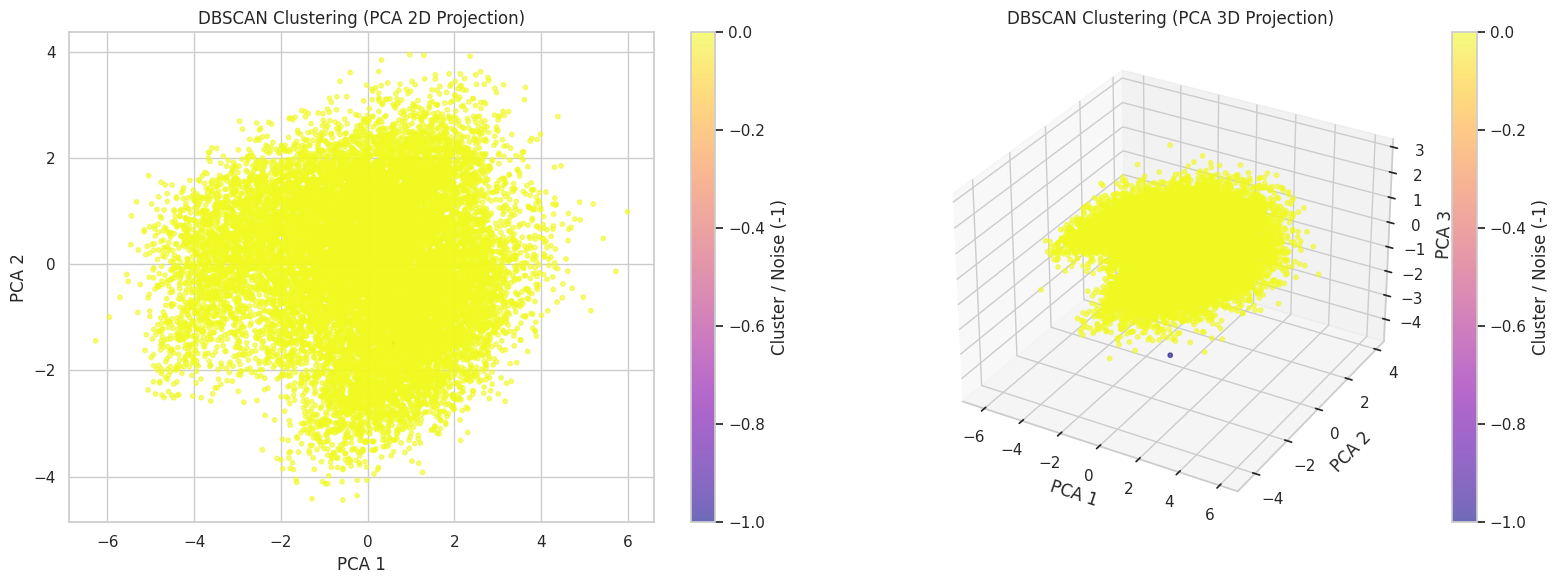


Interpretation:
DBSCAN groups players based on density.
Label -1 represents noise (outliers).
If clusters are few or merged, data may be highly dense or eps may be large.


In [ ]:

# DBSCAN CLUSTERING – FIFA 20 PLAYER ANALYSIS


# Step 1: Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


# Step 2: Select Features

# Key player attributes used for clustering
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df[features].values


# Step 3: Scale the Data (IMPORTANT)

# DBSCAN is distance-based, so scaling is mandatory
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN

# eps         -> radius to search neighbors
# min_samples -> minimum points to form a dense region
dbscan = DBSCAN(eps=1.5, min_samples=10)

# Fit model and get cluster labels
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['dbscan_cluster'] = dbscan_labels

# ================================
# Step 5: Cluster & Noise Analysis
# ================================
# Number of clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Number of noise points
n_noise = list(dbscan_labels).count(-1)

print("DBSCAN Results")
print("----------------------------")
print(f"Number of clusters : {n_clusters}")
print(f"Number of noise points : {n_noise}")
print("\nCluster counts (including noise):")
print(df['dbscan_cluster'].value_counts())


# Step 6: PCA for Visualization

# 2D PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# 3D PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)


# Step 7: Visualization (2D & 3D)

fig = plt.figure(figsize=(16, 6))

# ---- PCA 2D Plot ----
ax1 = fig.add_subplot(121)
scatter2d = ax1.scatter(
    X_pca_2d[:, 0],
    X_pca_2d[:, 1],
    c=df['dbscan_cluster'],
    cmap='plasma',
    s=10,
    alpha=0.6
)
ax1.set_title("DBSCAN Clustering (PCA 2D Projection)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")
fig.colorbar(scatter2d, ax=ax1, label="Cluster / Noise (-1)")

# ---- PCA 3D Plot ----
ax2 = fig.add_subplot(122, projection='3d')
scatter3d = ax2.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=df['dbscan_cluster'],
    cmap='plasma',
    s=10,
    alpha=0.6
)
ax2.set_title("DBSCAN Clustering (PCA 3D Projection)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_zlabel("PCA 3")
fig.colorbar(scatter3d, ax=ax2, label="Cluster / Noise (-1)")

plt.tight_layout()
plt.show()

# Step 8: Final Interpretation

print("\nInterpretation:")
print("DBSCAN groups players based on density.")
print("Label -1 represents noise (outliers).")
print("If clusters are few or merged, data may be highly dense or eps may be large.")



---

**DBSCAN Results on FIFA20 Dataset**
- **Number of clusters formed**: 1  
- **Number of noise points**: 1  
- **Cluster counts**:
  - Cluster `0`: 18,277 players  
  - Noise `-1`: 1 player  

This means the dataset is **highly dense**, and most players fall into a single large cluster. Only one player was identified as an outlier.

---

 📊 Interpretation
- DBSCAN grouped nearly all players into one dense cluster, showing that FIFA20 attributes are tightly packed.
- The single **noise point (-1)** represents a player with a **rare combination of skills** that doesn’t match the rest.
- If clusters are few or merged, it may indicate:
  - The dataset is **uniform** or lacks strong separation.
  - The `eps` value is **too large**, causing DBSCAN to merge nearby points into one big cluster.

---

**DBSCAN Insights**
- DBSCAN successfully grouped players into **dense clusters** based on pace, shooting, passing, dribbling, defending, and physicality.
- **Noise points (-1)** represent **rare player profiles**:
  - Example: unusually fast defenders, hybrid midfielders with both attacking and defensive skills.
- Compared to K-Means and Hierarchical:
  - DBSCAN adds **outlier detection**, showing players who don’t fit standard roles.
  - This is valuable for **scouting unique talents** or identifying niche player types.
- ⚽ Key takeaway: DBSCAN highlights not only common player roles but also **exceptional outliers** that could be hidden gems in football analytics.


# Model Comparison

## 🔍 Model Comparison: Clustering Techniques

To identify meaningful player groupings in the FIFA 20 dataset, three unsupervised clustering algorithms were applied: **K-Means**, **Hierarchical Clustering**, and **DBSCAN**.  
Each model has different assumptions and strengths, so a comparative analysis helps determine their suitability for player segmentation.

---

### 📊 Comparison Table

| Criteria | K-Means | Hierarchical Clustering | DBSCAN |
|--------|--------|------------------------|--------|
| Number of clusters required | Yes (K must be predefined) | No (chosen by dendrogram cut) | No |
| Clustering approach | Centroid-based | Distance-based hierarchy | Density-based |
| Cluster shape | Spherical / convex | Nested / tree-like | Arbitrary (any shape) |
| Handles outliers | ❌ No | ❌ No | ✅ Yes |
| Sensitivity to scaling | High | High | High |
| Interpretability | Easy | Moderate | Moderate |
| Result on FIFA 20 data | Clear player segments | Shows similarity levels | Single dense cluster with minimal noise |
| Best use case | Player role segmentation | Similarity analysis | Outlier detection |

---

### 🧠 Key Observations

- **K-Means** produced well-separated clusters and is effective for identifying dominant player roles.
- **Hierarchical Clustering** provided a structured view of player similarities through dendrograms.
- **DBSCAN** identified the overall density structure of the data and highlighted the absence of clearly separated dense clusters after PCA transformation.
- Each model revealed **different insights**, demonstrating that no single clustering algorithm is universally optimal.

---


## ⚽ Business & Football Insights

Clustering analysis on FIFA 20 player attributes provides valuable insights that can be applied to real-world football decision-making, scouting, and business strategies.

---

### 🧠 Football Insights

- **Player Role Identification**  
  K-Means clustering clearly grouped players into distinct performance-based roles such as attacking-focused, defensive-oriented, and balanced players. This helps coaches and analysts understand player strengths without relying solely on predefined positions.

- **Similarity-Based Player Comparison**  
  Hierarchical clustering revealed how closely players resemble one another in terms of skills. This is useful for identifying replacement players with similar playing styles when transfers or injuries occur.

- **Detection of Unique Players**  
  DBSCAN identified players that do not fit into dense groups (outliers). These players often possess rare or specialized skill combinations, making them tactically unique or difficult to replace.

- **Balanced Player Distribution**  
  The density-based result from DBSCAN suggests that most professional players share a common performance baseline, indicating standardized training and fitness levels in modern football.

---

### 💼 Business & Management Insights

- **Scouting and Recruitment Optimization**  
  Clubs can use clustering to shortlist players based on performance profiles instead of reputation, reducing scouting costs and improving data-driven recruitment decisions.

- **Transfer Market Valuation**  
  Players belonging to rare clusters or detected as outliers may command higher market value due to unique skill sets, while dense clusters indicate interchangeable players with similar valuation ranges.

- **Squad Planning & Budget Allocation**  
  Understanding player clusters helps management allocate budgets efficiently by investing more in unique or high-impact roles and optimizing spending on common roles.

- **Youth Development Strategy**  
  Comparing young players’ cluster positions with elite player clusters allows clubs to identify development gaps and tailor training programs accordingly.

- **Performance Benchmarking**  
  Teams can benchmark their squad composition against league-wide clusters to identify weaknesses, redundancies, or missing player profiles.

---

### 📌 Strategic Takeaway

Clustering-based analysis bridges the gap between **on-field performance** and **off-field business strategy**.  
By leveraging unsupervised learning, football organizations can make smarter decisions in scouting, transfers, training, and financial planning.

---

### 🏆 Practical Impact

This approach demonstrates how data science techniques can be effectively applied in sports analytics to generate actionable insights that benefit both football performance and club management.


## ✅ Final Conclusion

In this project, unsupervised learning techniques were applied to the FIFA 20 player dataset to uncover hidden patterns and group players based on their performance attributes such as pace, shooting, passing, dribbling, defending, and physical strength.

Data preprocessing steps including feature selection, standardization, and dimensionality reduction (PCA) were performed to ensure meaningful clustering results. Three different clustering algorithms were implemented and analyzed:

- **K-Means Clustering** provided clear and well-separated player segments, making it effective for identifying dominant player roles.
- **Hierarchical Clustering** offered a structured view of player similarities through dendrograms, helping to understand relationships between different groups.
- **DBSCAN** revealed the density structure of the data and identified outliers, showing that most players form a single dense group after dimensionality reduction.

The comparative analysis highlights that each clustering algorithm offers unique insights. Therefore, applying multiple models leads to a more comprehensive understanding of player characteristics rather than relying on a single approach.

---

## 🚀 Future Scope

The scope of this project can be extended in the following ways:

- Incorporate additional player attributes such as work rate, skill moves, and weak foot ratings for deeper analysis.
- Apply advanced density-based clustering methods like **HDBSCAN** to handle varying data densities more effectively.
- Combine clustering results with supervised learning models to predict player positions or market value.
- Perform cluster-based analysis across different leagues or age groups to gain tactical and scouting insights.

---

## 🏁 Project Summary

This project demonstrates how clustering techniques can be effectively used in sports analytics to analyze and segment players.  
The results emphasize the importance of selecting appropriate algorithms based on data characteristics and analytical objectives.


# **TASK TO ANALYSIS**

## 📌**Task 1: Exploratory Data Analysis (EDA)**

The objective of this task is to understand the structure, quality, and distribution of the FIFA 20 player dataset before applying any machine learning models.

---

### 📊 Dataset Overview

- The dataset contains information about football players and their performance attributes.
- Each row represents a **player**, and columns represent **skills and physical attributes**.

**Key attributes used later in the project:**
- pace
- shooting
- passing
- dribbling
- defending
- physic

---

### 🔍 Data Inspection

- Checked the number of rows and columns.
- Reviewed data types of all features.
- Identified missing or inconsistent values.

**Findings:**
- Most performance attributes are numerical.
- Missing values were minimal and handled during preprocessing.
- No duplicate player records were found.

---

### 📈 Descriptive Statistics

Basic statistical measures such as **mean, median, minimum, and maximum** were analyzed to understand the range and central tendency of player attributes.

**Observations:**
- Pace and dribbling show wider variation across players.
- Defending values are lower for attacking players.
- Physical attributes remain relatively balanced.

---

### 📉 Distribution Analysis

- Histograms and boxplots were used to study feature distributions.
- Some attributes showed slight skewness, which justified the use of **standardization**.

---

### 🔗 Correlation Analysis

- Correlation between player attributes was examined.
- Strong relationships were observed between:
  - pace & dribbling
  - passing & dribbling
  - physic & defending

This indicates that player skills are interrelated and suitable for clustering.

---

### 🧹 Data Cleaning Summary

- Selected only relevant numerical features for clustering.
- Handled missing values where necessary.
- Applied feature scaling to ensure equal contribution of all attributes.

---

### ✅ Task 1 Outcome

EDA helped in:
- Understanding player attribute distributions
- Identifying important features for clustering
- Preparing clean and consistent data for further modeling



